David Tony Veliath <br>
AM.EN.U4CSE21219 <br>
19CSE304 Labsheet 6 (blog writing)

PART 1: SYNTHEETIC DATASET GENERATION

1) Import necesasary libraries

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import faker
import random
import datetime
import pydbgen

2) Decide upon and initialise relevant features

In [702]:
Planet_Name = []
Stellar_Type = []
Planet_Type = []

STEs = [] #Surface Temperature Estimate
ESI = [] #Earth Similartiy Index
HZD = [] #Habitable Zone DIstance
PHI = [] #Planetary Habitability Index
SHI = [] #Stellar Habitability Index
BCI = [] #Biologial Complexity Index
TLI = [] #Tidal Locking Index

Habitability = []

2) Create functions to generate data for completely randomized features, subsequent features are dependant on these features. Some level of bias is required to artificially increase the number of planets with features desirable to habitability, as if we try to keep it realistic then habitable planets are a very small minority. This leads to a very one sided dataset which is undesirable for any actualk learning algorithms and visualisation.

In [703]:
ST = {'O':0.10, 'B':0.20, 'A':0.30, 'F':0.85, 'G':0.95, 'K':1.00, 'M':0.55}
PT = {'Rocky':0.35, 'Super-Earth':1, 'Mini-neptune':0.65, 'Gas/Ice Giant':0.10}
STE = {'Hypopsychroplanet':0.1, 'Psychroplanet':0.5, 'Mesoplanet':1.0, 'Thermoplanet':0.6, 'Hyperthermoplanet':0.1}

def generate_exoplanet_name():
    prefixes = ['HD', 'HR', 'Gliese', 'WASP', 'Kepler', 'TRAPPIST', 'TOI', 'OGLE', 'COROT']
    suffixes = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'Prime', 'Majoris', 'Minoris']

    return random.choice(prefixes) + '-' + str(random.randint(1, 1000)) + ' ' + random.choice(suffixes)

def generate_stellar_type():
    x = random.randint(0, 10)
    return random.choice(['O', 'B', 'A', 'F', 'G', 'K', 'M']) if x<3 else random.choice(['F', 'G', 'K'])

def generate_planet_type():
    x = random.randint(0, 10)
    return random.choice(['Rocky', 'Super-Earth', 'Mini-neptune', 'Gas/Ice Giant']) if x<4 else 'Super-Earth'

def generate_STE():
    x = random.randint(0, 10)
    return random.choice(['Hypopsychroplanet', 'Psychroplanet', 'Mesoplanet', 'Thermoplanet', 'Hyperthermoplanet']) if x<4 else 'Mesoplanet'

def generate_TLI():
    return random.randint(900, 2000)/1000

3) Create functions to semi-randomly generate data that correlate to previously generated features. As we are working with a limited amount of features we take a simplified appproach to generating values, with a reliance on randomness.

In [704]:
def generate_ESI(st, pt, ste):
    return ST[st]*PT[pt]*STE[ste]*random.randint(800, 1000)/1000

def generate_HZD(st):
    return ST[st]*random.randint(600, 1000)/1000

def generate_PHI(st, pt, ste):
    return ST[st]*PT[pt]*STE[ste]*random.randint(750, 1000)/1000

def generate_SHI(st):
    return ST[st]*random.randint(800, 1000)/1000

def generate_BCI(st, pt):
    return ST[st]*PT[pt]*random.randint(100, 1000)/1000

def calculate_habitability(esi, hzd, phi, shi, bci, tli):
    tl=random.randint(700,1000)/1000 if tli>1 else random.randint(100, 400)/1000
    x = round(esi*hzd*phi*shi*bci*tl*6.9*100, 6)
    return x if x<100 else random.randint(75000000, 100000000)/1000000


4) Use the previously defined functions to actually populate the dataset with datapoints. We use a dataframe from the pandas module. Note that we create a few extra datapoints so that we can remove a few later in event of duplication

In [705]:
num = 1010

for i in range(num):
    pn = generate_exoplanet_name()
    st = generate_stellar_type()
    pt = generate_planet_type()
    ste = generate_STE()
    esi = generate_ESI(st, pt, ste)
    hzd = generate_HZD(st)
    phi = generate_PHI(st, pt, ste)
    shi = generate_SHI(st)
    bci = generate_BCI(st, pt)
    tli = generate_TLI()
    h = calculate_habitability(esi, hzd, phi, shi, bci, tli)

    Planet_Name.append(pn)
    Stellar_Type.append(st)
    Planet_Type.append(pt)
    STEs.append(ste)
    ESI.append(esi)
    HZD.append(hzd)
    PHI.append(phi)
    SHI.append(shi)
    BCI.append(bci)
    TLI.append(tli)
    Habitability.append(h)

df = pd.DataFrame({'Planet Name':Planet_Name, 'Stellar Type':Stellar_Type, 'Planet Type':Planet_Type, 'Surface Temperature Estimate':STEs, 'Earth Similarity Index':ESI, 'Habitable Zone Distance':HZD, 'Planetary Habitability Index':PHI, 'Stellar Habitability Index':SHI, 'Biological Complexity Index':BCI, 'Tidal Locking Index':TLI, 'Habitability Percentage':Habitability})

PART 2: DATA EXPLORATION

1) Use info to list out the features and determine their datatypes

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Planet Name                   1010 non-null   object 
 1   Stellar Type                  1010 non-null   object 
 2   Planet Type                   1010 non-null   object 
 3   Surface Temperature Estimate  1010 non-null   object 
 4   Earth Similarity Index        1010 non-null   float64
 5   Habitable Zone Distance       1010 non-null   float64
 6   Planetary Habitability Index  1010 non-null   float64
 7   Stellar Habitability Index    1010 non-null   float64
 8   Biological Complexity Index   1010 non-null   float64
 9   Tidal Locking Index           1010 non-null   float64
 10  Habitability Percentage       1010 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.9+ KB


2) Use describe to get a rough idea about the distribution of data we are working with (There will be heavy bias with the categorical data but that is intentional)

In [707]:
df.describe(include='O') #categorical data

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate
count,1010,1010,1010,1010
unique,1005,7,4,5
top,COROT-209 Minoris,F,Super-Earth,Mesoplanet
freq,2,304,749,701


In [708]:
df.describe() #numerical data

,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,0.491005,0.669986,0.476629,0.754883,0.387111,1.466415,36.852001
std,0.332048,0.216435,0.322617,0.221622,0.271704,0.314246,37.398778
min,0.000808,0.061500,0.000913,0.080000,0.001370,0.904000,0.000000
25%,0.097625,0.597762,0.095895,0.741413,0.151475,1.199250,0.767606
50%,0.497325,0.708900,0.488467,0.818725,0.325541,1.471000,23.283068
75%,0.811638,0.816650,0.782850,0.888575,0.615912,1.738500,78.485920
max,0.997000,0.999000,0.995000,0.999000,0.997000,2.000000,99.656948


3) Use head and tail to get an idea of how the data looks

In [709]:
df.head()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
0,WASP-591 h,K,Rocky,Mesoplanet,0.31675,0.60900,0.30275,0.8430,0.04445,1.898,1.192871
1,TRAPPIST-921 e,B,Super-Earth,Mesoplanet,0.17660,0.13240,0.17000,0.1602,0.17160,1.897,0.073437
2,OGLE-820 b,K,Super-Earth,Mesoplanet,0.93200,0.86200,0.86500,0.8210,0.88000,1.996,99.450990
3,HR-197 b,F,Super-Earth,Mesoplanet,0.73100,0.56865,0.72845,0.7004,0.81090,1.948,94.932449
4,TRAPPIST-291 f,K,Rocky,Mesoplanet,0.29050,0.84300,0.33425,0.8160,0.14490,1.797,5.082032


In [710]:
df.tail()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
1005,WASP-587 Majoris,K,Super-Earth,Mesoplanet,0.9070,0.852,0.7590,0.922,0.127,1.651,41.512271
1006,COROT-555 e,K,Super-Earth,Hypopsychroplanet,0.0941,0.612,0.0863,0.965,0.820,1.626,2.596893
1007,WASP-76 b,K,Super-Earth,Hypopsychroplanet,0.0902,0.825,0.0854,0.962,0.767,1.048,2.310128
1008,Gliese-72 Prime,K,Super-Earth,Mesoplanet,0.9670,0.965,0.9450,0.847,0.271,1.755,87.385671
1009,COROT-178 Majoris,K,Super-Earth,Mesoplanet,0.8600,0.604,0.7630,0.854,0.591,1.529,84.923763


PART 3: DATA TRANSFORMATION

1) First, we will find and eliminate duplicate values. As this is just an example dataset, we will do all operations directly on the dataset

In [711]:
duplicated_rows = df[df.duplicated(subset='Planet Name', keep=False)]
duplicated_rows.head(20)

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage
95,OGLE-402 b,F,Super-Earth,Thermoplanet,0.438090,0.66300,0.503880,0.72250,0.588200,1.644,35.620011
215,COROT-178 Majoris,G,Super-Earth,Mesoplanet,0.899650,0.85785,0.787550,0.79135,0.865450,1.574,98.100270
344,HD-252 i,K,Super-Earth,Thermoplanet,0.529800,0.61200,0.577800,0.99900,0.638000,1.389,80.907291
447,COROT-209 Minoris,G,Mini-neptune,Hyperthermoplanet,0.050326,0.61275,0.054216,0.85785,0.247617,1.471,0.220298
489,COROT-209 Minoris,G,Super-Earth,Mesoplanet,0.796100,0.89205,0.871150,0.93575,0.660250,1.182,96.552880
814,OGLE-402 b,G,Super-Earth,Thermoplanet,0.545490,0.66215,0.554610,0.88255,0.632700,1.746,62.208848
871,HD-252 i,K,Super-Earth,Thermoplanet,0.538200,0.63900,0.453600,0.80500,0.742000,1.448,57.221137
906,COROT-377 Majoris,F,Super-Earth,Mesoplanet,0.748850,0.84150,0.716550,0.79305,0.181900,1.007,33.663528
967,COROT-377 Majoris,K,Super-Earth,Thermoplanet,0.503400,0.84900,0.516600,0.90800,0.324000,1.015,35.047900
1009,COROT-178 Majoris,K,Super-Earth,Mesoplanet,0.860000,0.60400,0.763000,0.85400,0.591000,1.529,84.923763


In [712]:
df.drop_duplicates(subset='Planet Name', keep='first', inplace=True)
df.describe(include='O')

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate
count,1005,1005,1005,1005
unique,1005,7,4,5
top,WASP-591 h,F,Super-Earth,Mesoplanet
freq,1,304,744,699


2) Now we will check for missing data. However, our method of data generation ensures no missing values.

In [713]:
print("Number of rows with missing data: ", df.isnull().any(axis=1).sum())

Number of rows with missing data:  0


3) The next step is normalization, however the way the dataset is generated ensures that the necessary values are already normalized between 0 and 1. As such we can skip this step.

In [714]:
numerical_columns = df.select_dtypes(include='number')
print(f"{'Column': <30}{'Max': <15}{'Min'}")
print()
for column in numerical_columns.columns:
    max_value = round(df[column].max(), 10)
    min_value = round(df[column].min(), 10)
    print(f"{column: <30}{max_value: <15}{min_value}")

Column                        Max            Min

Earth Similarity Index        0.997          0.000808
Habitable Zone Distance       0.999          0.0615
Planetary Habitability Index  0.995          0.000913
Stellar Habitability Index    0.999          0.08
Biological Complexity Index   0.997          0.00137
Tidal Locking Index           2.0            0.904
Habitability Percentage       99.656948      0.0


4. Now we can try some feature engineering. We will create a new categorical column Habitable which will simply assign a Habitable or Uninhabitable value to each exoplanet on basis of the Habitability Percentage.

In [715]:
habitable_threshold = 70
df['Habitable'] = df['Habitability Percentage'].apply(lambda x: 'Habitable' if x >= habitable_threshold else 'Uninhabitable') 
print(df['Habitable'].value_counts())


Uninhabitable    694
Habitable        311
Name: Habitable, dtype: int64


In [716]:
df.head()

,Planet Name,Stellar Type,Planet Type,Surface Temperature Estimate,Earth Similarity Index,Habitable Zone Distance,Planetary Habitability Index,Stellar Habitability Index,Biological Complexity Index,Tidal Locking Index,Habitability Percentage,Habitable
0,WASP-591 h,K,Rocky,Mesoplanet,0.31675,0.60900,0.30275,0.8430,0.04445,1.898,1.192871,Uninhabitable
1,TRAPPIST-921 e,B,Super-Earth,Mesoplanet,0.17660,0.13240,0.17000,0.1602,0.17160,1.897,0.073437,Uninhabitable
2,OGLE-820 b,K,Super-Earth,Mesoplanet,0.93200,0.86200,0.86500,0.8210,0.88000,1.996,99.450990,Habitable
3,HR-197 b,F,Super-Earth,Mesoplanet,0.73100,0.56865,0.72845,0.7004,0.81090,1.948,94.932449,Habitable
4,TRAPPIST-291 f,K,Rocky,Mesoplanet,0.29050,0.84300,0.33425,0.8160,0.14490,1.797,5.082032,Uninhabitable


PART 4: VISUALISATION

1) We can create a correlation heatmap using all numerical features of our dataset.

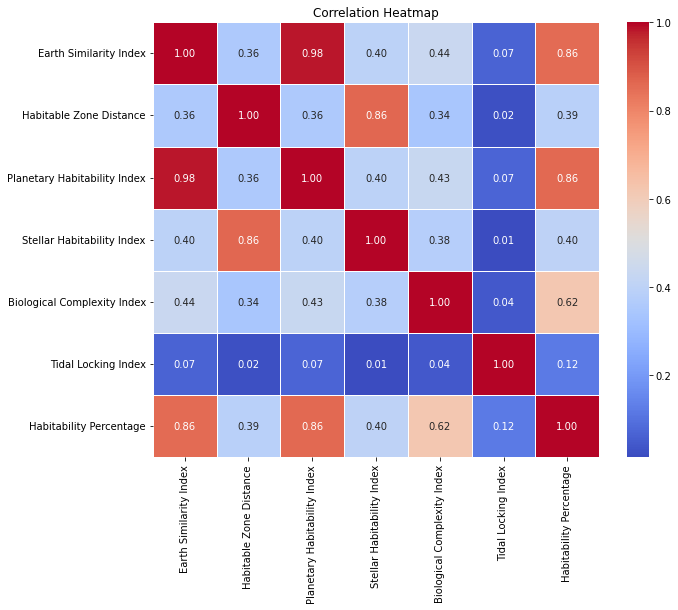

In [717]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

2) We can visualise the mean value of each numerical value for Habitable and Uninhabitable planets.

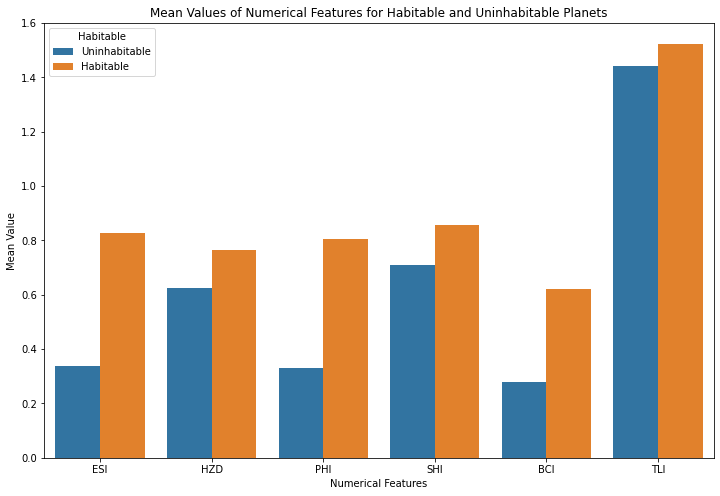

In [718]:
name_abbreviations = {'Surface Temperature Estimate':'STE', 'Earth Similarity Index':'ESI', 'Habitable Zone Distance':'HZD', 'Planetary Habitability Index':'PHI', 'Stellar Habitability Index':'SHI', 'Biological Complexity Index':'BCI', 'Tidal Locking Index':'TLI'}
df_abbreviated = df.rename(columns=name_abbreviations).drop(columns=['Habitability Percentage'])
numerical_columns = df_abbreviated.select_dtypes(include='number')
melted_df = pd.melt(df_abbreviated, id_vars=['Habitable'], value_vars=numerical_columns.columns)

plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Habitable', data=melted_df, errorbar=None)
plt.title('Mean Values of Numerical Features for Habitable and Uninhabitable Planets')
plt.xlabel('Numerical Features')
plt.ylabel('Mean Value')
plt.show()

3) We examine the relation between ESI and PHI to understand their similarities.

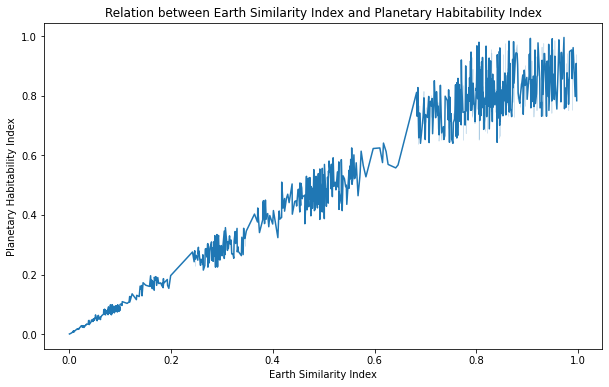

In [719]:
# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Earth Similarity Index', y='Planetary Habitability Index', data=df)
plt.title('Relation between Earth Similarity Index and Planetary Habitability Index')
plt.xlabel('Earth Similarity Index')
plt.ylabel('Planetary Habitability Index')
plt.show()

4. We can plot a distribution chart of habitabiity percentage.

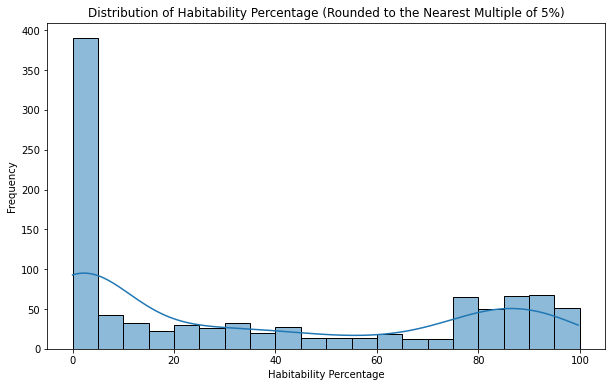

In [720]:
 plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Habitability Percentage', bins=range(0, 101, 5), kde=True)
plt.title('Distribution of Habitability Percentage (Rounded to the Nearest Multiple of 5%)')
plt.xlabel('Habitability Percentage')
plt.ylabel('Frequency')
plt.show()

5. We plot the average SHI for each class of star.

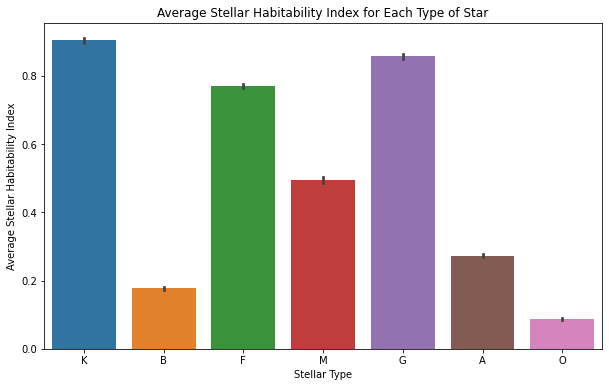

In [721]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stellar Type', y='Stellar Habitability Index', data=df)
plt.title('Average Stellar Habitability Index for Each Type of Star')
plt.xlabel('Stellar Type')
plt.ylabel('Average Stellar Habitability Index')
plt.show()

6. We plot the distribution of star types as a pie chart (it is very clearly biased but that is by design)

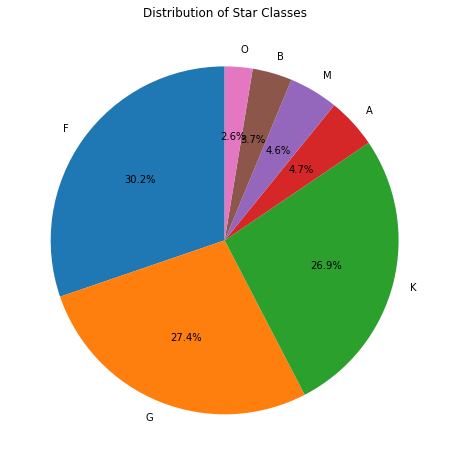

In [722]:
star_class_counts = df['Stellar Type'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.pie(star_class_counts, labels=star_class_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Star Classes')
plt.show()

7. We demonstrate the distribution of habitable and uninhabitable exoplanets on the basis of habitability percentage.

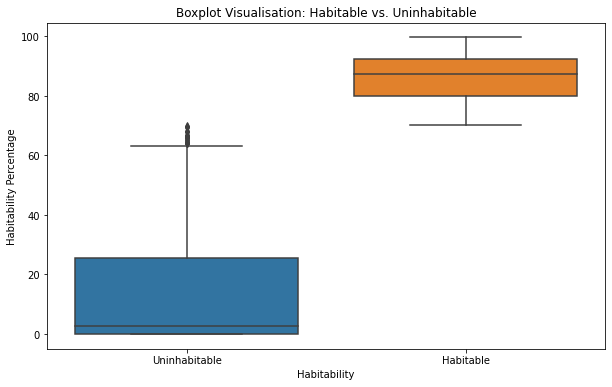

In [723]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitable', y='Habitability Percentage', data=df)
plt.title('Boxplot Visualisation: Habitable vs. Uninhabitable')
plt.xlabel('Habitability')
plt.ylabel('Habitability Percentage')
plt.show()

8) We compare the maximimum habitability percentage for each type of planet.

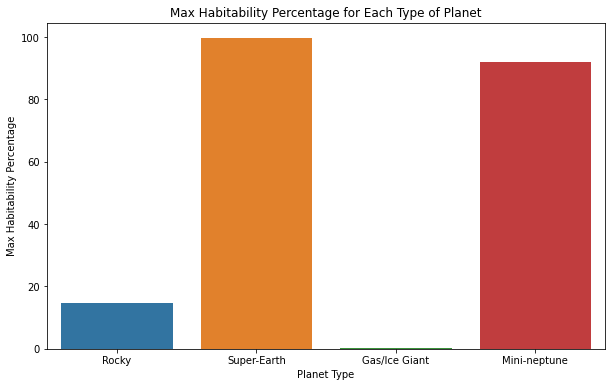

In [724]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Planet Type', y='Habitability Percentage', data=df, estimator=max, errorbar=None)
plt.title('Max Habitability Percentage for Each Type of Planet')
plt.xlabel('Planet Type')
plt.ylabel('Max Habitability Percentage')
plt.show()


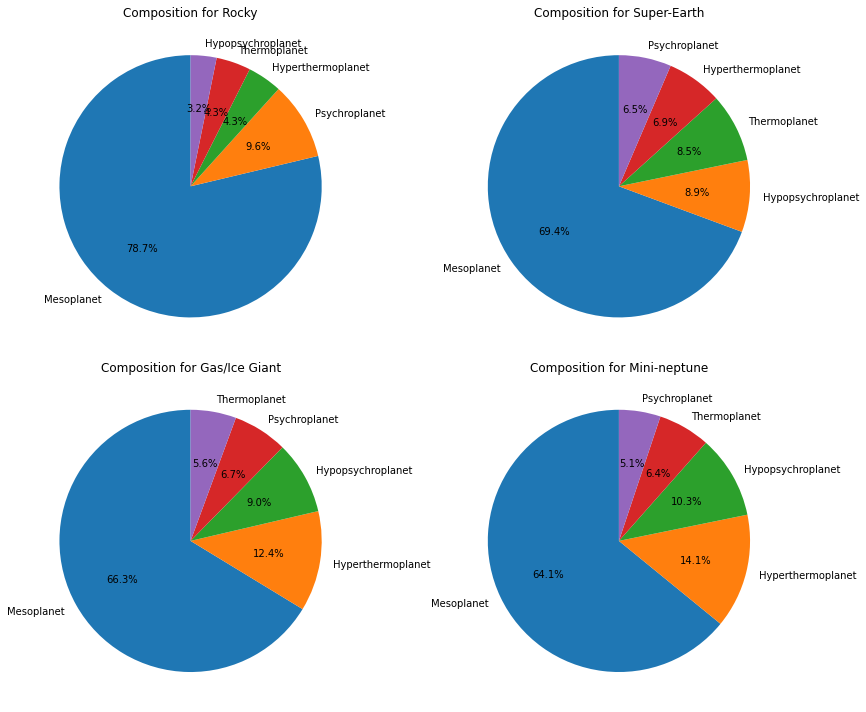

In [727]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw=dict(aspect="equal"))

# Set the background color of the entire figure to white
fig.patch.set_facecolor('white')

classifications = df['Planet Type'].unique()

for i, ax in enumerate(axes.flatten()):
    if i < len(classifications):
        current_classification = classifications[i]
        current_data = df[df['Planet Type'] == current_classification]['Surface Temperature Estimate']

        # Calculate percentages for each surface temperature estimate
        percentages = current_data.value_counts(normalize=True) * 100

        # Plot the pie chart
        ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'STE Composition for {current_classification}')
    else:
        ax.axis('off')  # Turn off the empty subplots if there are fewer classifications than subplots

plt.tight_layout()
plt.show()